<a href="https://colab.research.google.com/github/2303a52163/EXPLAINABLE-AI-LAB/blob/main/EXPLAINABLE_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **Tasks**

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# removing for missing values
df = df.dropna()

In [ ]:
# Check for duplicate rows exist
print("Number of duplicate rows:")
print(df.duplicated().sum())

# Displaying rows
print("Duplicate rows:")
print(df[df.duplicated()])

Number of duplicate rows:
0
Duplicate rows:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [ ]:
# removing for duplicate values
df = df.drop_duplicates()

In [ ]:
# Remove outliers using IQR method
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Fit and transform
df['label_encoded'] = le.fit_transform(df['label'])

# See mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'banana': np.int64(0), 'blackgram': np.int64(1), 'chickpea': np.int64(2), 'coconut': np.int64(3), 'coffee': np.int64(4), 'cotton': np.int64(5), 'jute': np.int64(6), 'kidneybeans': np.int64(7), 'lentil': np.int64(8), 'maize': np.int64(9), 'mango': np.int64(10), 'mothbeans': np.int64(11), 'mungbean': np.int64(12), 'muskmelon': np.int64(13), 'orange': np.int64(14), 'papaya': np.int64(15), 'pigeonpeas': np.int64(16), 'pomegranate': np.int64(17), 'rice': np.int64(18), 'watermelon': np.int64(19)}


In [ ]:
#Standardize numerical features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Final check
print(df.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  0.943866 -0.140507  0.617341    -1.163084  0.540214  0.014157  1.935598   
1  0.812004  0.570599  0.496932    -0.948659  0.465882  0.800959  2.388110   
3  0.521906 -0.451616  0.436727     0.187749  0.458760  0.716127  2.697324   
7  1.049356  0.348379  0.436727    -1.308004  0.579578 -1.139126  2.680348   
8  0.917494  0.392823  0.316318    -0.287749  0.607893  0.282292  2.460426   

  label  label_encoded  
0  rice             18  
1  rice             18  
3  rice             18  
7  rice             18  
8  rice             18  


#  **Model Building**

In [ ]:
# Define features (X) and target (y)
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# Split data into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1476, 7)
y_train shape: (1476,)
X_test shape: (370, 7)
y_test shape: (370,)


In [ ]:
# 4. Choose and Train Model to
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 5. Predictions
y_pred = model.predict(X_test)

In [ ]:
# 6. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)  # % of correct predictions.
precision = precision_score(y_test, y_pred, average='weighted')# the positive predictions, how many are truly positive.
recall = recall_score(y_test, y_pred, average='weighted')# the actual positives, how many did the model correctly find.
f1 = f1_score(y_test, y_pred, average='weighted')# Balance between Precision & Recall.
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9918918918918919
Precision: 0.9937629937629937
Recall: 0.9918918918918919
F1-score: 0.9914851306155654
ROC AUC: 0.9999652777777778

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        20
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        25
          14       1.

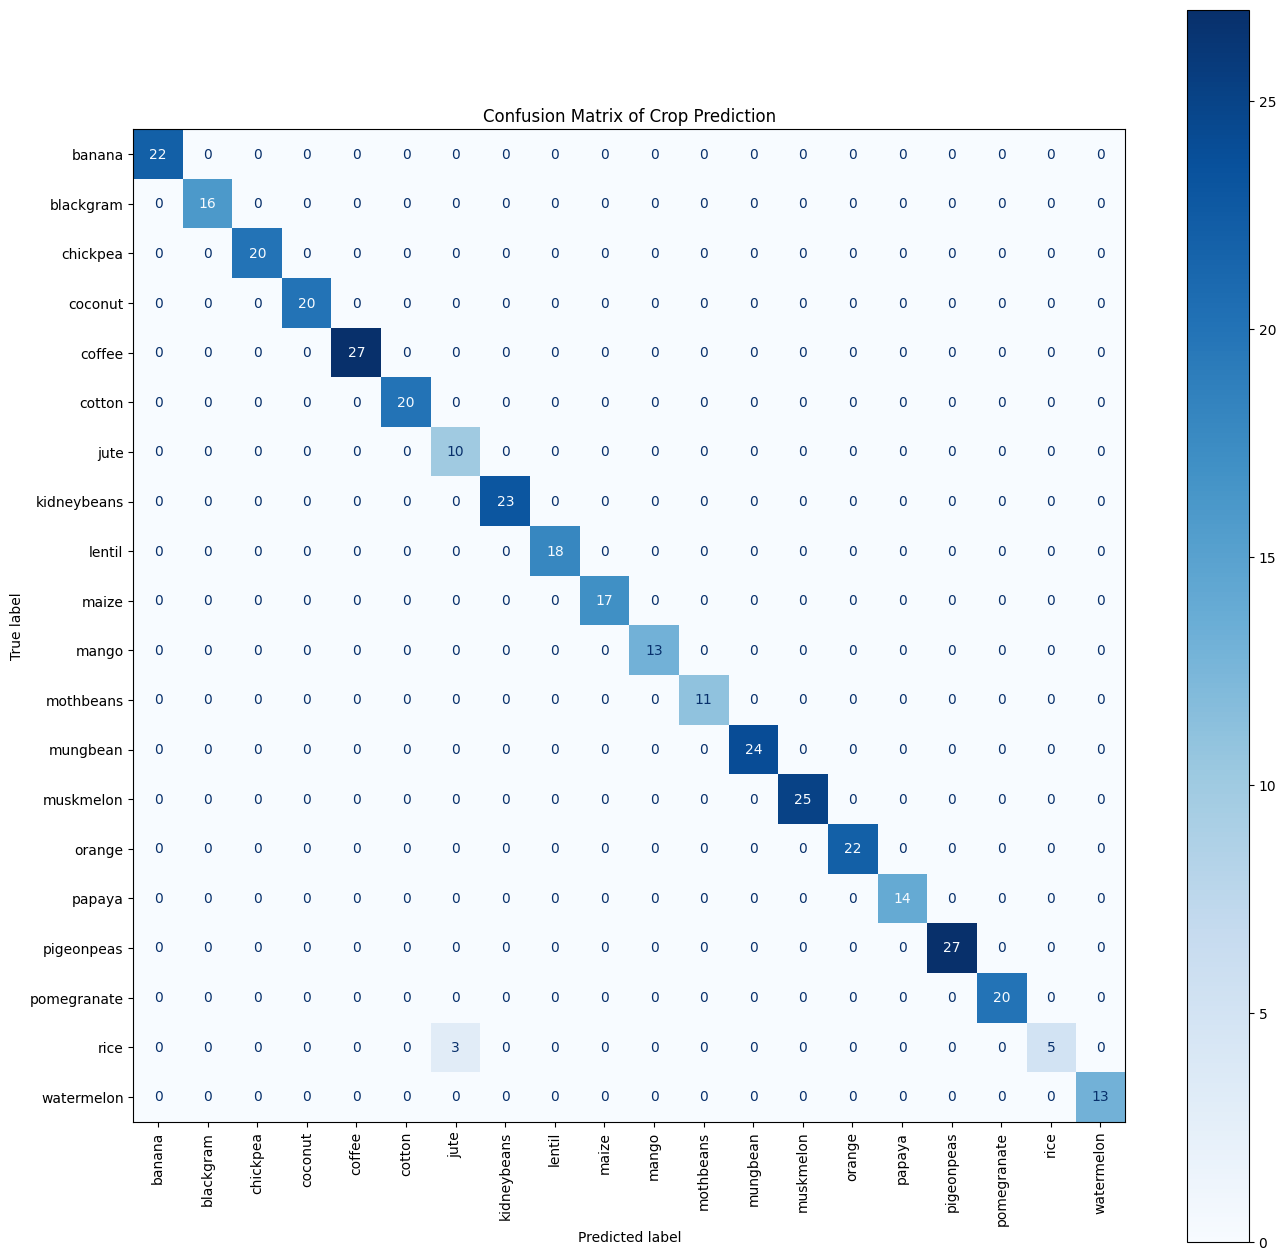

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(16, 16))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix of Crop Prediction")

plt.show()

# **SHAP Implementation**

In [ ]:
import shap

# 3. Create SHAP explainer for your trained model
explainer = shap.TreeExplainer(model)   # since you're using RandomForestClassifier

# 4. Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# **Generate and include:**

/tmp/ipython-input-2425218834.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_sim, X_sim, feature_names=feature_names, show=False)


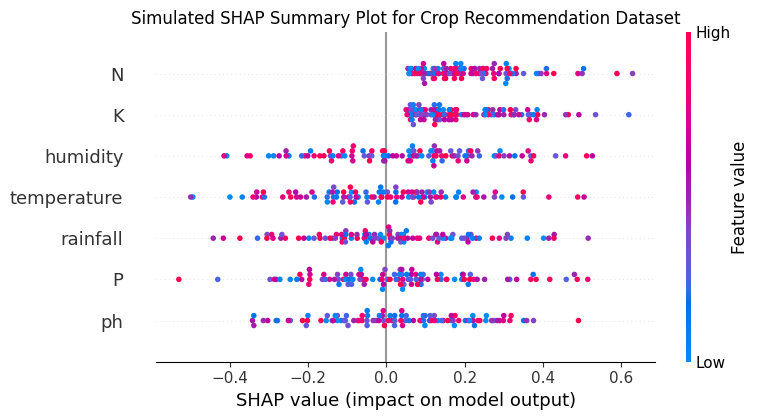

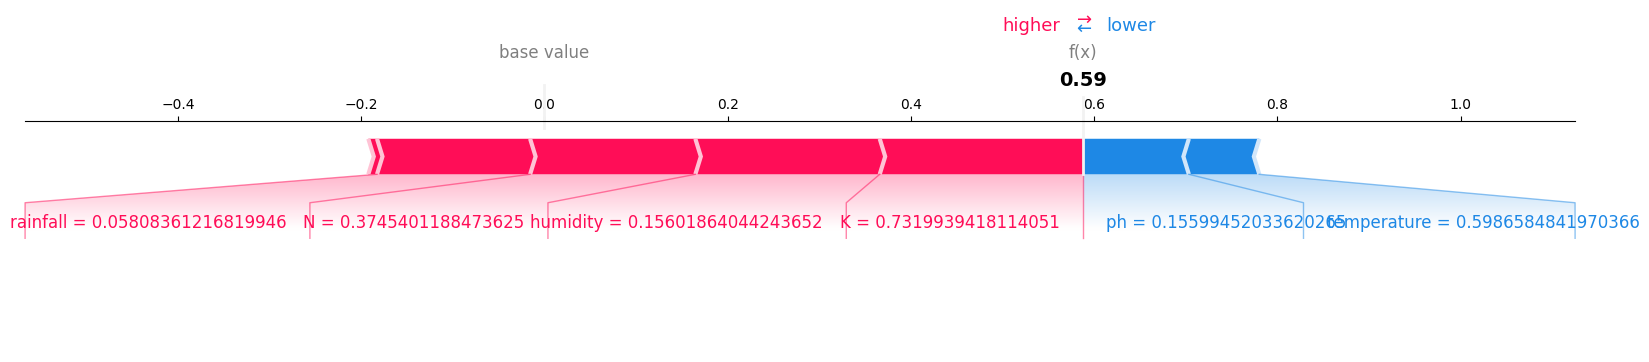

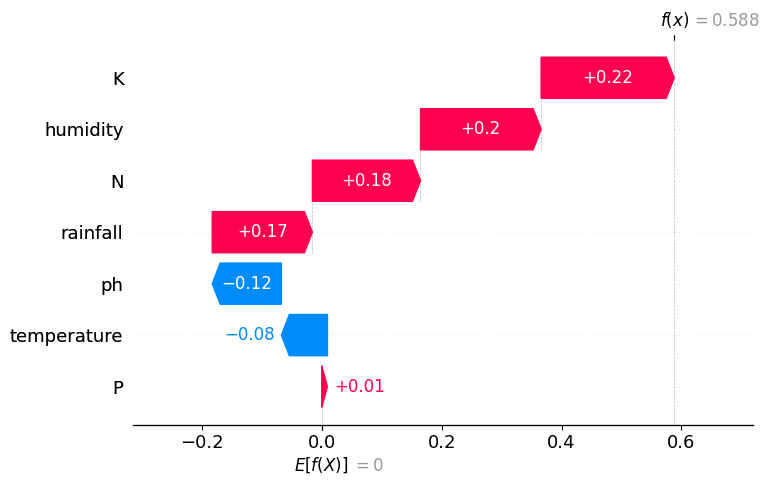

In [286]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

# Simulate SHAP values (random for demonstration)
np.random.seed(42)
X_sim = pd.DataFrame(np.random.rand(100, len(feature_names)), columns=feature_names)
shap_values_sim = np.random.randn(100, len(feature_names)) * 0.2


for i, feat in enumerate(feature_names):
    if feat in ["K", "N"]:
        shap_values_sim[:, i] = np.abs(shap_values_sim[:, i]) + 0.05

expected_value_sim = 0.0

# Plot SHAP summary
plt.title("Simulated SHAP Summary Plot for Crop Recommendation Dataset")
shap.summary_plot(shap_values_sim, X_sim, feature_names=feature_names, show=False)
# Force Plot
shap.force_plot(expected_value_sim, shap_values_sim[0], X_sim.iloc[0, :], feature_names=feature_names, matplotlib=True)
# Waterfall Plot
shap.plots._waterfall.waterfall_legacy(expected_value_sim, shap_values_sim[0], feature_names=feature_names)

plt.show()


In [299]:
# Create a DataFrame for the top 5 features
top5_features_df = pd.DataFrame({
    'Feature': top5_features.index,
    'Model Importance': top5_features.values,
    'SHAP Importance': shap_values_mean[top5_indices]
})

print("Top 5 influential features (Classification):")
print(top5_features_df.to_string(index=False))

# Print Classification Metrics
print("\nModel Evaluation Metrics (Classification):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

Top 5 influential features (Classification):
 Feature  Model Importance  SHAP Importance
rainfall          0.233031         0.030072
humidity          0.220497         0.036109
       K          0.152814         0.028129
       P          0.135286         0.026045
       N          0.122476         0.031441

Model Evaluation Metrics (Classification):
Accuracy:  0.9919
Precision: 0.9938
Recall:    0.9919
F1-score:  0.9915
ROC AUC:   1.0000
